In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Fuga e Explosão de Gradientes

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

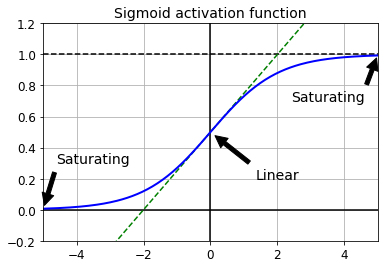

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

# Inicialização Glorot e He

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

# Funções de Ativação e Não Saturação

## Leaky ReLU

In [7]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

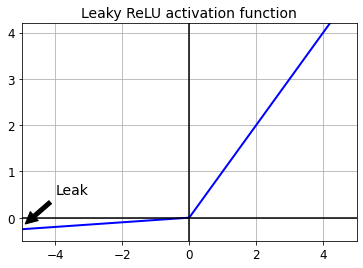

In [8]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [9]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [10]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 1ms/step - loss: 1.3212 - accuracy: 0.6134 - val_loss: 0.8968 - val_accuracy: 0.7164
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7937 - accuracy: 0.7499 - val_loss: 0.7034 - val_accuracy: 0.7738
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6698 - accuracy: 0.7845 - val_loss: 0.6309 - val_accuracy: 0.7928
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6090 - accuracy: 0.8010 - val_loss: 0.5786 - val_accuracy: 0.8086
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5720 - accuracy: 0.8103 - val_loss: 0.5480 - val_accuracy: 0.8214
Epoch 6/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5460 - accuracy: 0.8159 - val_loss: 0.5262 - val_accuracy: 0.8274
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5263 - accuracy: 0.8216 - val_loss: 0.5082 - val_accuracy:

In [15]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3859 - accuracy: 0.5790 - val_loss: 0.9245 - val_accuracy: 0.7030
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8253 - accuracy: 0.7294 - val_loss: 0.7321 - val_accuracy: 0.7582
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7018 - accuracy: 0.7689 - val_loss: 0.6569 - val_accuracy: 0.7870
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6369 - accuracy: 0.7913 - val_loss: 0.5997 - val_accuracy: 0.8054
Epoch 5/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5940 - accuracy: 0.8045 - val_loss: 0.5642 - val_accuracy: 0.8158
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5627 - accuracy: 0.8139 - val_loss: 0.5380 - val_accuracy: 0.8228
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5390 - accuracy: 0.8203 - val_loss: 0.5159 - val_accuracy:

## ELU

In [18]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

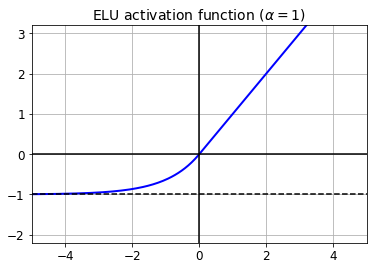

In [19]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [20]:
keras.layers.Dense(10, activation="elu")

## SELU

In [21]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [22]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

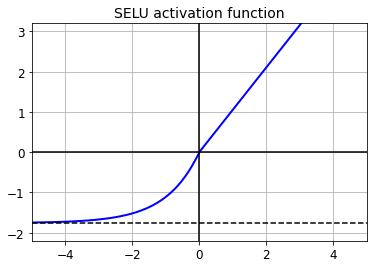

In [23]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [24]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [25]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [29]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [30]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 20s 11ms/step - loss: 1.1815 - accuracy: 0.5439 - val_loss: 0.7990 - val_accuracy: 0.7106
Epoch 2/5
1719/1719 [==============================] - 18s 10ms/step - loss: 0.7032 - accuracy: 0.7339 - val_loss: 0.6143 - val_accuracy: 0.7744
Epoch 3/5
1719/1719 [==============================] - 18s 10ms/step - loss: 0.6137 - accuracy: 0.7768 - val_loss: 0.5823 - val_accuracy: 0.7888
Epoch 4/5
1719/1719 [==============================] - 18s 10ms/step - loss: 0.5383 - accuracy: 0.8100 - val_loss: 0.5350 - val_accuracy: 0.7984
Epoch 5/5
1719/1719 [==============================] - 18s 10ms/step - loss: 0.4923 - accuracy: 0.8287 - val_loss: 0.4833 - val_accuracy: 0.8258


In [31]:
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [34]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 17s 9ms/step - loss: 1.9652 - accuracy: 0.2155 - val_loss: 1.7441 - val_accuracy: 0.3488
Epoch 2/5
1719/1719 [==============================] - 15s 9ms/step - loss: 1.3524 - accuracy: 0.4444 - val_loss: 0.9828 - val_accuracy: 0.5924
Epoch 3/5
1719/1719 [==============================] - 15s 9ms/step - loss: 1.0438 - accuracy: 0.5855 - val_loss: 0.8546 - val_accuracy: 0.6712
Epoch 4/5
1719/1719 [==============================] - 16s 9ms/step - loss: 1.1628 - accuracy: 0.5386 - val_loss: 0.8577 - val_accuracy: 0.6706
Epoch 5/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.9661 - accuracy: 0.6162 - val_loss: 0.7957 - val_accuracy: 0.6948


# Normalização Batch

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_212 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_213 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [37]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [39]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8555 - accuracy: 0.7104 - val_loss: 0.5665 - val_accuracy: 0.8110
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5738 - accuracy: 0.8023 - val_loss: 0.4834 - val_accuracy: 0.8402
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5166 - accuracy: 0.8206 - val_loss: 0.4455 - val_accuracy: 0.8520
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4779 - accuracy: 0.8318 - val_loss: 0.4231 - val_accuracy: 0.8558
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4538 - accuracy: 0.8399 - val_loss: 0.4079 - val_accuracy: 0.8588
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4377 - accuracy: 0.8457 - val_loss: 0.3951 - val_accuracy: 0.8634
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4247 - accuracy: 0.8508 - val_loss: 0.3839 - val_accuracy:

In [40]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [41]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [42]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1031 - accuracy: 0.6512 - val_loss: 0.6873 - val_accuracy: 0.7818
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6894 - accuracy: 0.7769 - val_loss: 0.5600 - val_accuracy: 0.8106
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6013 - accuracy: 0.8017 - val_loss: 0.5035 - val_accuracy: 0.8290
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5470 - accuracy: 0.8175 - val_loss: 0.4689 - val_accuracy: 0.8386
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5122 - accuracy: 0.8261 - val_loss: 0.4454 - val_accuracy: 0.8448
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4892 - accuracy: 0.8340 - val_loss: 0.4278 - val_accuracy: 0.8502
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4725 - accuracy: 0.8390 - val_loss: 0.4142 - val_accuracy:

# Clipping do Gradiente

In [43]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [44]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# Reutilização de Camadas Pré-Treinada

In [45]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [46]:
X_train_A.shape

(43986, 28, 28)

In [47]:
X_train_B.shape

(200, 28, 28)

In [48]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [49]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [50]:
tf.random.set_seed(42)
np.random.seed(42)

In [51]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [52]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [53]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.5708 - accuracy: 0.8137 - val_loss: 0.3992 - val_accuracy: 0.8602
Epoch 2/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3624 - accuracy: 0.8753 - val_loss: 0.3372 - val_accuracy: 0.8759
Epoch 3/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3241 - accuracy: 0.8864 - val_loss: 0.3032 - val_accuracy: 0.8961
Epoch 4/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3032 - accuracy: 0.8942 - val_loss: 0.2877 - val_accuracy: 0.9003
Epoch 5/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2887 - accuracy: 0.8990 - val_loss: 0.2753 - val_accuracy: 0.9051
Epoch 6/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2782 - accuracy: 0.9022 - val_loss: 0.2700 - val_accuracy: 0.9083
Epoch 7/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2691 - accuracy: 0.9067 - val_loss: 0.2671 - val_accuracy:

In [54]:
model_A.save("my_model_A.h5")

In [55]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [56]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [57]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 31ms/step - loss: 0.8550 - accuracy: 0.5600 - val_loss: 0.4211 - val_accuracy: 0.8519
Epoch 2/20
7/7 [==============================] - 0s 11ms/step - loss: 0.4227 - accuracy: 0.8450 - val_loss: 0.3143 - val_accuracy: 0.9270
Epoch 3/20
7/7 [==============================] - 0s 14ms/step - loss: 0.3257 - accuracy: 0.9150 - val_loss: 0.2562 - val_accuracy: 0.9442
Epoch 4/20
7/7 [==============================] - 0s 16ms/step - loss: 0.2677 - accuracy: 0.9350 - val_loss: 0.2173 - val_accuracy: 0.9503
Epoch 5/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2258 - accuracy: 0.9450 - val_loss: 0.1896 - val_accuracy: 0.9625
Epoch 6/20
7/7 [==============================] - 0s 11ms/step - loss: 0.1940 - accuracy: 0.9600 - val_loss: 0.1692 - val_accuracy: 0.9665
Epoch 7/20
7/7 [==============================] - 0s 10ms/step - loss: 0.1712 - accuracy: 0.9700 - val_loss: 0.1543 - val_accuracy: 0.9686
Epoch 8/20
7/7 [===========

In [58]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_224 (Dense)           (None, 300)               235500    
                                                                 
 dense_225 (Dense)           (None, 100)               30100     
                                                                 
 dense_226 (Dense)           (None, 50)                5050      
                                                                 
 dense_227 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 50)                2550      
                                                                 
 dense_229 (Dense)           (None, 1)                

In [59]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [60]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [61]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [62]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 35ms/step - loss: 0.7948 - accuracy: 0.6050 - val_loss: 0.8772 - val_accuracy: 0.6247
Epoch 2/4
7/7 [==============================] - 0s 11ms/step - loss: 0.7582 - accuracy: 0.6200 - val_loss: 0.8388 - val_accuracy: 0.6400
Epoch 3/4
7/7 [==============================] - 0s 10ms/step - loss: 0.7223 - accuracy: 0.6350 - val_loss: 0.8029 - val_accuracy: 0.6511
Epoch 4/4
7/7 [==============================] - 0s 11ms/step - loss: 0.6890 - accuracy: 0.6400 - val_loss: 0.7708 - val_accuracy: 0.6582
Epoch 1/16
7/7 [==============================] - 0s 33ms/step - loss: 0.5419 - accuracy: 0.6950 - val_loss: 0.4391 - val_accuracy: 0.7880
Epoch 2/16
7/7 [==============================] - 0s 13ms/step - loss: 0.3295 - accuracy: 0.8150 - val_loss: 0.3061 - val_accuracy: 0.8651
Epoch 3/16
7/7 [==============================] - 0s 11ms/step - loss: 0.2343 - accuracy: 0.8800 - val_loss: 0.2364 - val_accuracy: 0.9077
Epoch 4/16
7/7 [===============

In [63]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9805


[0.08241385966539383, 0.9804999828338623]

In [64]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.9855


[0.06315494328737259, 0.9854999780654907]

# Otimizadores mais rápidos

## Otimizador Momentum

In [2]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

## Gradiente Acelerado de Nesterov

In [3]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

## AdaGrad

In [4]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

## RMSProp

In [5]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

## Otimização ADAM

In [6]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Otimização ADAMax

In [7]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Otimização NADAM

In [8]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Cronograma da Taxa de Aprendizado

## Power Scheduling

In [9]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [13]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4890 - accuracy: 0.8278 - val_loss: 0.4171 - val_accuracy: 0.8550
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3790 - accuracy: 0.8662 - val_loss: 0.3832 - val_accuracy: 0.8702
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3458 - accuracy: 0.8764 - val_loss: 0.3756 - val_accuracy: 0.8700
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3245 - accuracy: 0.8841 - val_loss: 0.3547 - val_accuracy: 0.8796
Epoch 5/25
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3079 - accuracy: 0.8899 - val_loss: 0.3578 - val_accuracy: 0.8778
Epoch 6/25
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2958 - accuracy: 0.8939 - val_loss: 0.3520 - val_accuracy: 0.8814
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2848 - accuracy: 0.8987 - val_loss: 0.3435 - val_accuracy:

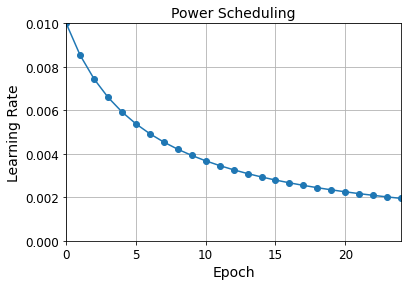

In [14]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## Exponential Scheduling

In [15]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [16]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [18]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8644 - accuracy: 0.7549 - val_loss: 0.9033 - val_accuracy: 0.7758 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6698 - accuracy: 0.7986 - val_loss: 0.5813 - val_accuracy: 0.8136 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5785 - accuracy: 0.8213 - val_loss: 0.5909 - val_accuracy: 0.8378 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5112 - accuracy: 0.8405 - val_loss: 0.6326 - val_accuracy: 0.8408 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4728 - accuracy: 0.8519 - val_loss: 0.5100 - val_accuracy: 0.8580 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4259 - accuracy: 0.8637 - val_loss: 0.5491 - val_accuracy: 0.8340 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 5s

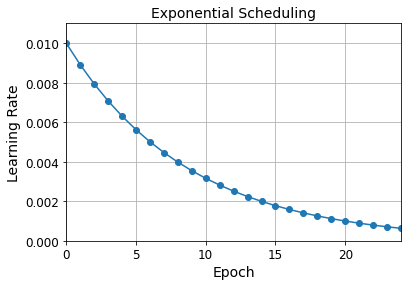

In [19]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [20]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [21]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8078 - accuracy: 0.7679 - val_loss: 0.6710 - val_accuracy: 0.7830 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6469 - accuracy: 0.7994 - val_loss: 0.7185 - val_accuracy: 0.8022 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5673 - accuracy: 0.8213 - val_loss: 0.4975 - val_accuracy: 0.8386 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5343 - accuracy: 0.8357 - val_loss: 0.5220 - val_accuracy: 0.8472 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4776 - accuracy: 0.8482 - val_loss: 0.5663 - val_accuracy: 0.8372 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4459 - accuracy: 0.8589 - val_loss: 0.4827 - val_accuracy: 0.8466 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 6s

In [22]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

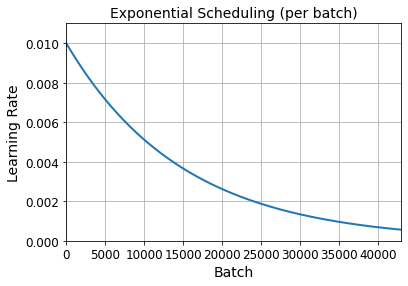

In [23]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

## Piecewise Constant Schedule

In [24]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [25]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [26]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8355 - accuracy: 0.7596 - val_loss: 0.7515 - val_accuracy: 0.7580 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8935 - accuracy: 0.7465 - val_loss: 1.0920 - val_accuracy: 0.6804 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9215 - accuracy: 0.7398 - val_loss: 0.9570 - val_accuracy: 0.7746 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0790 - accuracy: 0.6531 - val_loss: 1.0892 - val_accuracy: 0.5924 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1289 - accuracy: 0.6118 - val_loss: 1.9645 - val_accuracy: 0.5280 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8547 - accuracy: 0.6538 - val_loss: 0.9513 - val_accuracy: 0.6496 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 5s

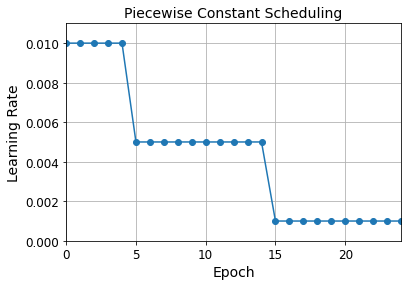

In [27]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## Performance Scheduling

In [28]:
tf.random.set_seed(42)
np.random.seed(42)

In [29]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6004 - accuracy: 0.8036 - val_loss: 0.4840 - val_accuracy: 0.8518 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4962 - accuracy: 0.8396 - val_loss: 0.5875 - val_accuracy: 0.8254 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5095 - accuracy: 0.8415 - val_loss: 0.4984 - val_accuracy: 0.8520 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5184 - accuracy: 0.8468 - val_loss: 0.5206 - val_accuracy: 0.8506 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5042 - accuracy: 0.8532 - val_loss: 0.5439 - val_accuracy: 0.8538 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5014 - accuracy: 0.8558 - val_loss: 0.5919 - val_accuracy: 0.8546 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 3s

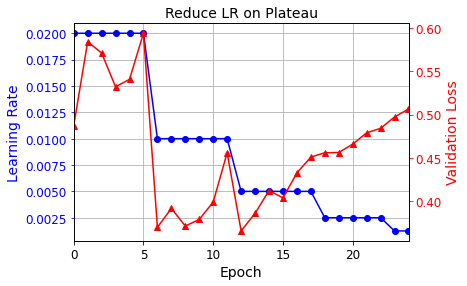

In [31]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

## Keras Scheduler

In [32]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4863 - accuracy: 0.8297 - val_loss: 0.4034 - val_accuracy: 0.8630
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3800 - accuracy: 0.8646 - val_loss: 0.3731 - val_accuracy: 0.8678
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3460 - accuracy: 0.8768 - val_loss: 0.3761 - val_accuracy: 0.8688
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3242 - accuracy: 0.8837 - val_loss: 0.3494 - val_accuracy: 0.8756
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3082 - accuracy: 0.8905 - val_loss: 0.3424 - val_accuracy: 0.8758
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.8950 - val_loss: 0.3416 - val_accuracy: 0.8802
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.8985 - val_loss: 0.3358 - val_accuracy:

In [33]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

## 1 cycle Scheduling

In [34]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [35]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.3590


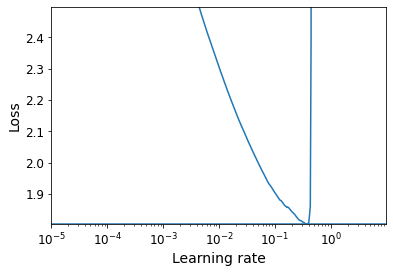

In [36]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [37]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [38]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 2s 5ms/step - loss: 0.6606 - accuracy: 0.7732 - val_loss: 0.4876 - val_accuracy: 0.8284
Epoch 2/25
430/430 [==============================] - 2s 4ms/step - loss: 0.4550 - accuracy: 0.8411 - val_loss: 0.4254 - val_accuracy: 0.8522
Epoch 3/25
430/430 [==============================] - 2s 5ms/step - loss: 0.4109 - accuracy: 0.8553 - val_loss: 0.4112 - val_accuracy: 0.8566
Epoch 4/25
430/430 [==============================] - 2s 4ms/step - loss: 0.3827 - accuracy: 0.8657 - val_loss: 0.3815 - val_accuracy: 0.8646
Epoch 5/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3627 - accuracy: 0.8721 - val_loss: 0.3728 - val_accuracy: 0.8702
Epoch 6/25
430/430 [==============================] - 2s 4ms/step - loss: 0.3449 - accuracy: 0.8781 - val_loss: 0.3698 - val_accuracy: 0.8704
Epoch 7/25
430/430 [==============================] - 2s 4ms/step - loss: 0.3317 - accuracy: 0.8818 - val_loss: 0.3562 - val_accuracy: 0.8732
Epoch 

# Evitando Overfitting com Regularização

## Regularização L1 e L2

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [4]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 1.6345 - accuracy: 0.8105 - val_loss: 0.7258 - val_accuracy: 0.8248
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7226 - accuracy: 0.8253 - val_loss: 0.7005 - val_accuracy: 0.8254


In [6]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 5s 3ms/step - loss: 1.6439 - accuracy: 0.8111 - val_loss: 0.7734 - val_accuracy: 0.7982
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7200 - accuracy: 0.8269 - val_loss: 0.6857 - val_accuracy: 0.8372


## Dropout

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5744 - accuracy: 0.8033 - val_loss: 0.4038 - val_accuracy: 0.8536
Epoch 2/2
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4202 - accuracy: 0.8464 - val_loss: 0.3546 - val_accuracy: 0.8676


## Alpha Dropout

In [8]:
tf.random.set_seed(42)
np.random.seed(42)

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 2ms/step - loss: 0.6622 - accuracy: 0.7610 - val_loss: 0.5710 - val_accuracy: 0.8442
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5559 - accuracy: 0.7948 - val_loss: 0.5733 - val_accuracy: 0.8412
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5257 - accuracy: 0.8073 - val_loss: 0.4956 - val_accuracy: 0.8558
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5055 - accuracy: 0.8142 - val_loss: 0.4658 - val_accuracy: 0.8662
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4944 - accuracy: 0.8176 - val_loss: 0.4686 - val_accuracy: 0.8572
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4802 - accuracy: 0.8221 - val_loss: 0.4806 - val_accuracy: 0.8630
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4712 - accuracy: 0.8269 - val_loss: 0.4668 - val_accuracy:

In [10]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.8646


[0.45241400599479675, 0.8646000027656555]

In [11]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 2s 1ms/step - loss: 0.3312 - accuracy: 0.8862


[0.33118191361427307, 0.8862000107765198]

In [12]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.4185 - accuracy: 0.8455


## MC Dropout

In [13]:
tf.random.set_seed(42)
np.random.seed(42)

In [14]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [15]:
np.round(model.predict(X_test_scaled[:1]), 2)

1/1 [==============================] - 0s 91ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.92]],
      dtype=float32)

In [17]:
np.round(y_probas[:2, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.45, 0.  , 0.37, 0.  , 0.19]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.68, 0.  , 0.27]]],
      dtype=float32)

In [18]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.34, 0.  , 0.52]],
      dtype=float32)

In [19]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.25, 0.  , 0.26]],
      dtype=float32)

In [20]:
y_pred = np.argmax(y_proba, axis=1)

In [21]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8643

In [22]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [23]:
tf.random.set_seed(42)
np.random.seed(42)

In [24]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [25]:
mc_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaDr  (None, 784)              0         
 opout)                                                          
                                                                 
 dense_10 (Dense)            (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_11 (Dense)            (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlpha  (None, 100)             

In [26]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [27]:
mc_model.set_weights(model.get_weights())

In [28]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

1/1 [==============================] - 0s 14ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.31, 0.  , 0.51]],
      dtype=float32)

## Max Norm

In [29]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [30]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4783 - accuracy: 0.8330 - val_loss: 0.3759 - val_accuracy: 0.8668
Epoch 2/2
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3542 - accuracy: 0.8701 - val_loss: 0.3631 - val_accuracy: 0.8684


# Exercicios

## 8.

### a.

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for layer in range(20):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

In [9]:
len(model.layers)

21

### b.

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170498071/170498071 [==============================] - 11s 0us/step


In [12]:
X_train[0].shape

(32, 32, 3)

In [14]:
y_train.shape

(45000, 1)

In [15]:
X_train.shape

(45000, 32, 32, 3)

In [16]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [18]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [22]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [23]:
n_epochs = 20
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=callbacks)

Epoch 1/20
1407/1407 [==============================] - 11s 7ms/step - loss: 2.0227 - accuracy: 0.2209 - val_loss: 2.0327 - val_accuracy: 0.2114
Epoch 2/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9676 - accuracy: 0.2492 - val_loss: 1.9205 - val_accuracy: 0.2718
Epoch 3/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9561 - accuracy: 0.2577 - val_loss: 2.0175 - val_accuracy: 0.2140
Epoch 4/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9464 - accuracy: 0.2536 - val_loss: 2.0962 - val_accuracy: 0.2092
Epoch 5/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9226 - accuracy: 0.2628 - val_loss: 1.9118 - val_accuracy: 0.2612
Epoch 6/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9077 - accuracy: 0.2666 - val_loss: 1.9139 - val_accuracy: 0.2618
Epoch 7/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8948 - accuracy: 0.2704 - val_loss: 1.8952 - val_ac

In [24]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 2ms/step - loss: 1.8450 - accuracy: 0.3004


[1.8450154066085815, 0.3003999888896942]

### c.

In [38]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_normal = keras.models.Sequential()
model_normal.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model_normal.add(keras.layers.BatchNormalization())

for layer in range(20):    
    model_normal.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model_normal.add(keras.layers.BatchNormalization())
    model_normal.add(keras.layers.Activation("elu"))

model_normal.add(keras.layers.Dense(10, activation="softmax"))

model_normal.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [39]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 2
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [40]:
n_epochs = 20
history = model_normal.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=callbacks)

Epoch 1/20
1407/1407 [==============================] - 27s 15ms/step - loss: 1.8924 - accuracy: 0.3169 - val_loss: 1.7283 - val_accuracy: 0.3742
Epoch 2/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.7205 - accuracy: 0.3807 - val_loss: 1.6244 - val_accuracy: 0.4154
Epoch 3/20
1407/1407 [==============================] - 19s 13ms/step - loss: 1.6389 - accuracy: 0.4122 - val_loss: 1.5527 - val_accuracy: 0.4244
Epoch 4/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.5825 - accuracy: 0.4326 - val_loss: 1.5770 - val_accuracy: 0.4420
Epoch 5/20
1407/1407 [==============================] - 21s 15ms/step - loss: 1.5391 - accuracy: 0.4510 - val_loss: 1.4717 - val_accuracy: 0.4726
Epoch 6/20
1407/1407 [==============================] - 19s 14ms/step - loss: 1.4990 - accuracy: 0.4647 - val_loss: 1.4510 - val_accuracy: 0.4728
Epoch 7/20
1407/1407 [==============================] - 21s 15ms/step - loss: 1.4600 - accuracy: 0.4790 - val_loss: 1.4646 -

In [41]:
model_normal = keras.models.load_model("my_cifar10_model.h5")
model_normal.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 2ms/step - loss: 1.3330 - accuracy: 0.5354


[1.3330464363098145, 0.5353999733924866]

Não chegou a ficar mais rapido, mas melhorou a acurácia, talvez aumentando a quantidade de epocas ja melhoraria

### d.

In [42]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_selu = keras.models.Sequential()
model_selu.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for layer in range(20):
    model_selu.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))

model_selu.add(keras.layers.Dense(10, activation="softmax"))

model_selu.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [43]:
model_selu.layers

In [44]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 3
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [46]:
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

n_epochs = 20
history = model_selu.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=callbacks)

Epoch 1/20
1407/1407 [==============================] - 11s 7ms/step - loss: 1.9884 - accuracy: 0.2418 - val_loss: 7.4075 - val_accuracy: 0.1206
Epoch 2/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8270 - accuracy: 0.3217 - val_loss: 19.0660 - val_accuracy: 0.1926
Epoch 3/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7248 - accuracy: 0.3650 - val_loss: 53.0823 - val_accuracy: 0.1546
Epoch 4/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6593 - accuracy: 0.3916 - val_loss: 16.7999 - val_accuracy: 0.2024
Epoch 5/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6237 - accuracy: 0.4172 - val_loss: 35.7478 - val_accuracy: 0.1844
Epoch 6/20
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5795 - accuracy: 0.4314 - val_loss: 37.3222 - val_accuracy: 0.2572
Epoch 7/20
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5249 - accuracy: 0.4588 - val_loss: 17.9634 - 

In [49]:
model_selu = keras.models.load_model("my_cifar10_model.h5")
model_selu.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.0491 - accuracy: 0.1009


[3.0490610599517822, 0.10090000182390213]

### e.

In [50]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_dropout = keras.models.Sequential()
model_dropout.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model_dropout.add(keras.layers.AlphaDropout(rate=0.2))

for layer in range(20):
    model_dropout.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
    model_dropout.add(keras.layers.AlphaDropout(rate=0.2))

model_dropout.add(keras.layers.Dense(10, activation="softmax"))

model_dropout.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [56]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model_dropout.h5", save_best_only=True)
run_index = 5
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [58]:
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_new_scaled = (X_train - X_means) / X_stds
X_valid_new_scaled = (X_valid - X_means) / X_stds
X_test_new_scaled = (X_test - X_means) / X_stds

n_epochs = 20
history = model_dropout.fit(X_train_new_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_new_scaled, y_valid),
                    callbacks=callbacks)

Epoch 1/20
1407/1407 [==============================] - 19s 14ms/step - loss: 1.9741 - accuracy: 0.2409 - val_loss: 48.1228 - val_accuracy: 0.2046
Epoch 2/20
1407/1407 [==============================] - 19s 13ms/step - loss: 1.9712 - accuracy: 0.2446 - val_loss: 83.1750 - val_accuracy: 0.1942
Epoch 3/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.9466 - accuracy: 0.2510 - val_loss: 39.0271 - val_accuracy: 0.1942
Epoch 4/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.9551 - accuracy: 0.2562 - val_loss: 36.8641 - val_accuracy: 0.1928
Epoch 5/20
1407/1407 [==============================] - 19s 13ms/step - loss: 1.9439 - accuracy: 0.2572 - val_loss: 47.8220 - val_accuracy: 0.2052
Epoch 6/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.9425 - accuracy: 0.2503 - val_loss: 37.5567 - val_accuracy: 0.1862
Epoch 7/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.9361 - accuracy: 0.2577 - val_loss: 27

ValueError: Unable to create dataset (name already exists)

In [59]:
model_dropout = keras.models.load_model("my_cifar10_model_dropout.h5")
model_dropout.evaluate(X_test_new_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 18.9676 - accuracy: 0.1811


[18.967618942260742, 0.181099995970726]